## **Implementation of RNN Stacked Architectures**

* RNN Neurons
* return sequences (stack layers of RNNs)
* Bi-directional RNNs
* Auto-encoder RNN

In [1]:
## amazon stock price
import yfinance as yf

AMZ_Ticker = yf.Ticker("AMZN")
AMZ_df = AMZ_Ticker.history(period="max")

####  **RNN Neuron**

In [21]:
## ten stocks prices amazon
import numpy as np

input = amazon[:10].values.T
input

## RNN Neurons tanh activation (e^x - e^-x / e^x + e^-x)
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

## weights on RNN unit are randomly initialized
Wx = 0.5  ## weight of the neuron
Wh = 0.8  ## feedback loop weight - positive
b = 0     ## by default zero

## hidden states (prediction sequence)
h = np.zeros(len(input))

## RNN neuron
for t,x in enumerate(input):
  if t == 0:
    h[t] = tanh(Wx * x + b)
  else:
    h[t] = tanh(Wx * x + Wh * h[t-1] + b)
    print(f'Time step {t+1}: h = {h[t]}')

Time step 2: h = 0.0821787871684545
Time step 3: h = 0.10802832917107345
Time step 4: h = 0.1266248169279392
Time step 5: h = 0.13612655210503888
Time step 6: h = 0.14281424300793835
Time step 7: h = 0.15059715856060363
Time step 8: h = 0.15870818998903535
Time step 9: h = 0.16376016369940039
Time step 10: h = 0.16705748533290515


In [22]:
## the sequence h can be returned
h   ## seq

array([0.04891942, 0.08217879, 0.10802833, 0.12662482, 0.13612655,
       0.14281424, 0.15059716, 0.15870819, 0.16376016, 0.16705749])

In [23]:
## the next day stock price
prediction = tanh(Wx * x + Wh * h[9] + b)
prediction ## vec

np.float64(0.16962058934369106)

#### **Implemetation**

In [3]:
amazon = AMZ_df['Close']

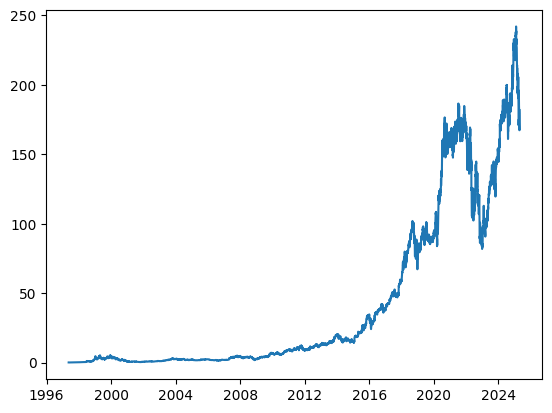

In [5]:
import matplotlib.pyplot as plt
plt.plot(amazon)

In [6]:
## train / test - sequences
train_data = amazon[:'2024-12-31']
test_data = amazon['2025-01-01':]

In [7]:
## Pre-Processing - MinMaxScaler 0 - 1
from sklearn.preprocessing import MinMaxScaler
## instance
scaler = MinMaxScaler()
## train
scaled_train = scaler.fit_transform(train_data.values.reshape(-1,1))
## test (transform - not supposed to peek on the test)
scaled_test = scaler.transform(test_data.values.reshape(-1,1))

In [10]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

## window size (length = 4)
length = 4

## train generator
train_generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=7)

## test generator
test_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=7)

In [25]:
## stacked RNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, SimpleRNN

## model
model = Sequential()
model.add(Input(shape=(length,1)))
model.add(SimpleRNN(units = 64, activation = 'relu', return_sequences=True))  ## sequences
model.add(SimpleRNN(units = 32, activation = 'relu', return_sequences=True))  ## sequences
model.add(SimpleRNN(units = 16, activation = 'relu'))  ## deep dense layer
model.add(Dense(8, activation='relu'))
model.add(Dense(1))  ## activation linear

In [27]:
## compile
model.compile(optimizer='adam', loss='mse')

In [28]:
## fit
history = model.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


993/993 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - loss: 0.0011 - val_loss: 0.0015
Epoch 2/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 4.7406e-04 - val_loss: 0.0060
Epoch 3/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.9125e-04 - val_loss: 0.0071
Epoch 4/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 0.0014 - val_loss: 7.0442e-04
Epoch 5/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 3.2660e-04 - val_loss: 0.0044
Epoch 6/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.1280e-04 - val_loss: 0.0010
Epoch 7/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 2.7431e-04 - val_loss: 0.0013
Epoch 8/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 2.6393e-04 - val_loss: 0.0013
Epoch 9/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.9178e-04 - val_loss: 0.0033
Epoch 10/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - loss: 8.3234e-04 - val_loss: 7.2055e-04
Epoch 11/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 1.5109e-04 - val_loss: 0.0036
Epoch 12/50
993/99

<Axes: >

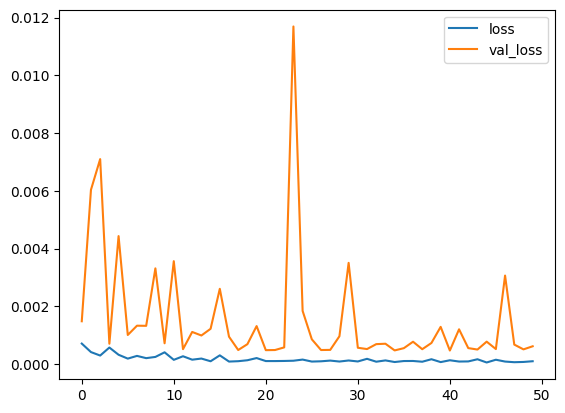

In [29]:
## plot history
import pandas as pd
pd.DataFrame(history.history).plot()

In [30]:
## predictions
predictions = model.predict(test_generator)

## invert scaling to get the amazon price
y_test = scaler.inverse_transform(scaled_test[length:])
predictions = scaler.inverse_transform(predictions)

## calculate R2
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step


0.9256611895481058

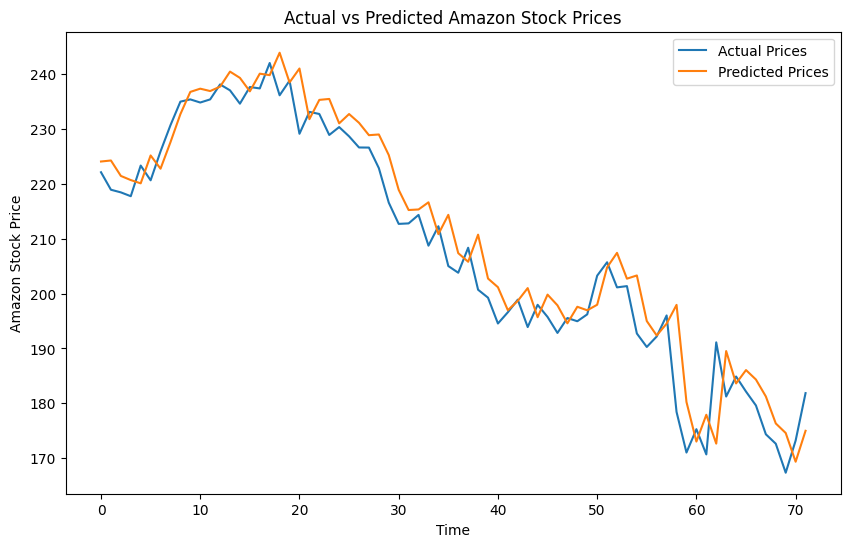

In [32]:
# prompt: plot of y_test vs predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.title('Actual vs Predicted Amazon Stock Prices')
plt.legend()
plt.show()

In [34]:
## Implement a CNN on the same data
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

## model 1 (Convolutional Neural Network)
model1 = Sequential()
model1.add(Input(shape=(length,1)))
model1.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model1.add(MaxPooling1D(pool_size=2))
model1.add(Flatten())

model1.add(Dense(8, activation='relu'))
model1.add(Dense(1))

## compile
model1.compile(optimizer='adam', loss='mse')

## fit
history1 = model1.fit(train_generator, epochs=50, validation_data=test_generator)

Epoch 1/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0215 - val_loss: 8.6686e-04
Epoch 2/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.0856e-04 - val_loss: 0.0014
Epoch 3/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.0619e-04 - val_loss: 9.5272e-04
Epoch 4/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0755e-04 - val_loss: 0.0011
Epoch 5/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.6178e-04 - val_loss: 7.2417e-04
Epoch 6/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.1083e-04 - val_loss: 8.6099e-04
Epoch 7/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.3755e-04 - val_loss: 7.0103e-04
Epoch 8/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0938e-04 - val_loss: 0.0021
Epoch 9/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 9.6235e-05 - val_loss: 6.9046e-04
Epoch 10/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2.2314e-04 - val_loss: 9.7160e-04
Epoch 11/50
993/993 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 9.0087e-05 - v

In [35]:
## predictions
predictions = model1.predict(test_generator)

## invert scaling to get the amazon price
## y_test = scaler.inverse_transform(scaled_test[length:])
predictions = scaler.inverse_transform(predictions)

## calculate R2
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step


0.800288916191723

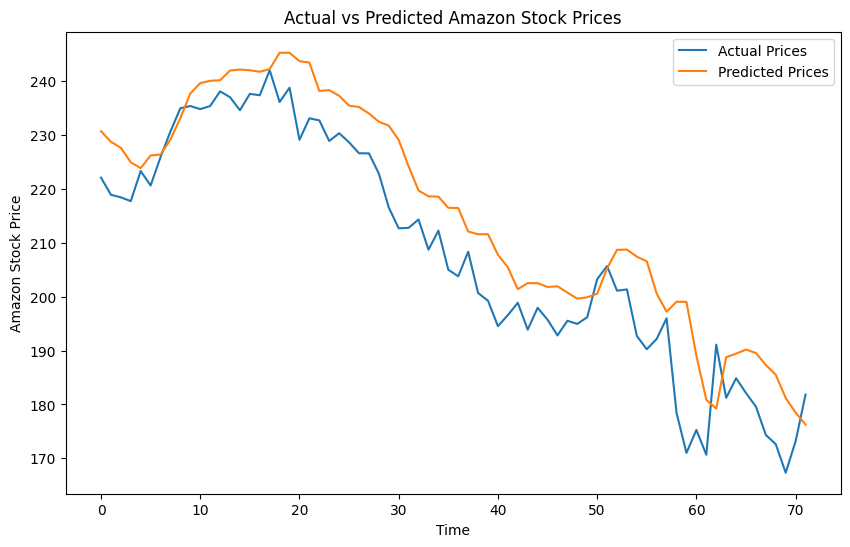

In [36]:
# prompt: plot of y_test vs predictions

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual Prices')
plt.plot(predictions, label='Predicted Prices')
plt.xlabel('Time')
plt.ylabel('Amazon Stock Price')
plt.title('Actual vs Predicted Amazon Stock Prices')
plt.legend()

In [37]:
##
predictions

array([[230.75687],
       [228.77658],
       [227.66478],
       [224.97246],
       [223.88622],
       [226.2373 ],
       [226.41623],
       [229.20303],
       [233.19667],
       [237.75668],
       [239.67337],
       [240.1076 ],
       [240.21408],
       [242.01329],
       [242.19289],
       [242.0599 ],
       [241.78781],
       [242.2782 ],
       [245.32228],
       [245.30766],
       [243.75334],
       [243.49316],
       [238.22331],
       [238.37163],
       [237.3292 ],
       [235.49493],
       [235.24165],
       [234.0315 ],
       [232.50645],
       [231.78159],
       [229.12682],
       [224.20203],
       [219.72575],
       [218.65117],
       [218.58778],
       [216.5222 ],
       [216.47522],
       [212.11307],
       [211.61194],
       [211.61375],
       [207.80832],
       [205.46333],
       [201.41144],
       [202.5245 ],
       [202.52583],
       [201.81503],
       [201.94458],
       [200.7754 ],
       [199.6391 ],
       [199.9007 ],
